In [85]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.6.0


In [86]:
import numpy as np
from sklearn.model_selection import train_test_split

datasetFileName = "dataset.npz"
with np.load(datasetFileName) as data:
    dataImages = data['images']
    dataLabels = data['labels']

classNames = ['Clean', 'Contaminated']


In [2]:
print(dataImages.shape)
dataImages.dtype


(248, 326, 244, 3)


dtype('uint8')

In [3]:
# dataShape = (len(dataImages),)+dataImages[0].shape
# print(dataShape)

In [4]:
# a = np.empty(dataShape, dtype=np.uint8)

# for i in range(len(dataImages)):
#     a[i] = dataImages[i].astype('uint8')

# dataImages = a

# del a

In [4]:
print(dataLabels.shape)
dataLabels.dtype


(248,)


dtype('int32')

In [98]:
# dataLabels = np.uint8(dataLabels)

# print(dataLabels.shape)
# dataLabels.dtype

In [87]:

# Split the data up in train and test sets
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.33, random_state=42)


In [7]:
trainImages.shape

(166, 326, 244, 3)

In [88]:
trainImages.dtype

dtype('uint8')

In [9]:
trainImages[0]

array([[[229, 217, 199],
        [227, 214, 196],
        [225, 213, 196],
        ...,
        [209, 201, 191],
        [209, 200, 191],
        [209, 200, 191]],

       [[231, 220, 200],
        [228, 216, 197],
        [226, 214, 197],
        ...,
        [209, 200, 191],
        [210, 200, 191],
        [209, 200, 191]],

       [[231, 219, 201],
        [227, 215, 198],
        [224, 212, 196],
        ...,
        [210, 200, 193],
        [210, 199, 193],
        [210, 200, 192]],

       ...,

       [[219, 215, 216],
        [220, 215, 216],
        [219, 214, 214],
        ...,
        [223, 219, 225],
        [222, 219, 225],
        [222, 219, 226]],

       [[220, 215, 218],
        [221, 214, 219],
        [220, 215, 217],
        ...,
        [223, 219, 226],
        [221, 217, 224],
        [223, 219, 226]],

       [[219, 213, 215],
        [220, 214, 216],
        [218, 214, 214],
        ...,
        [222, 216, 223],
        [223, 218, 225],
        [223, 218, 225]]

In [89]:
len(trainLabels)

166

In [90]:
trainLabels

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

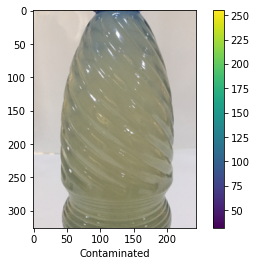

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
trainImages = trainImages / 255.0

testImages = testImages / 255.0

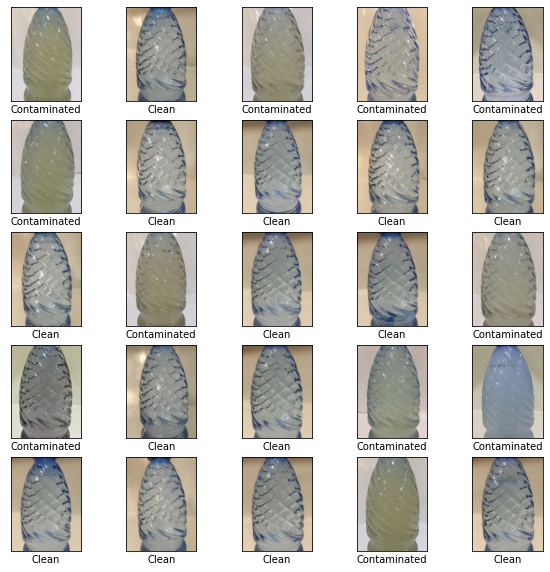

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [17]:
inputShape = trainImages[0].shape
print(inputShape)
outputShape = len(classNames)
print(outputShape)

(326, 244, 3)
2


In [91]:
import tensorflow as tf

model = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape)
])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 238632)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               30545024  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 30,545,282
Trainable params: 30,545,282
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.fit(trainImages, trainLabels, epochs=10)

Epoch 1/10
6/6 [==============================] - 4s 241ms/step - loss: 86.8625 - accuracy: 0.4578
Epoch 2/10
6/6 [==============================] - 1s 234ms/step - loss: 15.6964 - accuracy: 0.5060
Epoch 3/10
6/6 [==============================] - 1s 232ms/step - loss: 2.0259 - accuracy: 0.8313
Epoch 4/10
6/6 [==============================] - 1s 228ms/step - loss: 5.4403 - accuracy: 0.6928
Epoch 5/10
6/6 [==============================] - 1s 231ms/step - loss: 5.5268 - accuracy: 0.7530
Epoch 6/10
6/6 [==============================] - 1s 227ms/step - loss: 0.7450 - accuracy: 0.9096
Epoch 7/10
6/6 [==============================] - 1s 239ms/step - loss: 2.1349 - accuracy: 0.8614
Epoch 8/10
6/6 [==============================] - 2s 255ms/step - loss: 0.6117 - accuracy: 0.9458
Epoch 9/10
6/6 [==============================] - 1s 249ms/step - loss: 4.4930 - accuracy: 0.7651
Epoch 10/10
6/6 [==============================] - 1s 220ms/step - loss: 2.9665 - accuracy: 0.8193


In [93]:
testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=2)

print('\nTest accuracy:', testAcc)

3/3 - 0s - loss: 66.9997 - accuracy: 0.4390

Test accuracy: 0.4390243887901306


In [94]:
predictions = model.predict(testImages)
predictions[0]

array([107.18614, 182.5513 ], dtype=float32)

In [95]:
np.argmax(predictions[0])

1

In [96]:
testLabels[0]

0

In [22]:
probabilityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


In [23]:
predictions = probabilityModel.predict(testImages)


In [24]:
predictions[0]

array([1.000000e+00, 3.725732e-12], dtype=float32)

In [25]:
np.argmax(predictions[0])

0

In [26]:
testLabels[0]

0

In [27]:
import matplotlib.pyplot as plt

def plot_image(i, predictionsArray, trueLabels, img):
  trueLabel, img = trueLabels[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predictedLabel = np.argmax(predictionsArray)
  if predictedLabel == trueLabel:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classNames[predictedLabel],
                                100*np.max(predictionsArray),
                                classNames[trueLabel]),
                                color=color)

def plot_value_array(i, predictionsArray, trueLabels):
  trueLabel = trueLabels[i]
  plt.grid(False)
  plt.xticks(range(outputShape))
  plt.yticks([])
  thisplot = plt.bar(range(outputShape), predictionsArray, color="#777777")
  plt.ylim([0, 1])
  predictedLabel = np.argmax(predictionsArray)

  thisplot[predictedLabel].set_color('red')
  thisplot[trueLabel].set_color('blue')

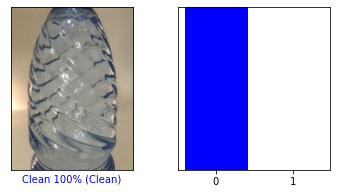

In [28]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], testLabels, testImages)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testLabels)
plt.show()

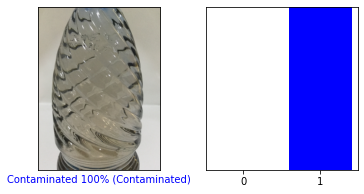

In [29]:
import matplotlib.pyplot as plt

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], testLabels, testImages)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testLabels)
plt.show()

In [30]:
testLabels[i]

1

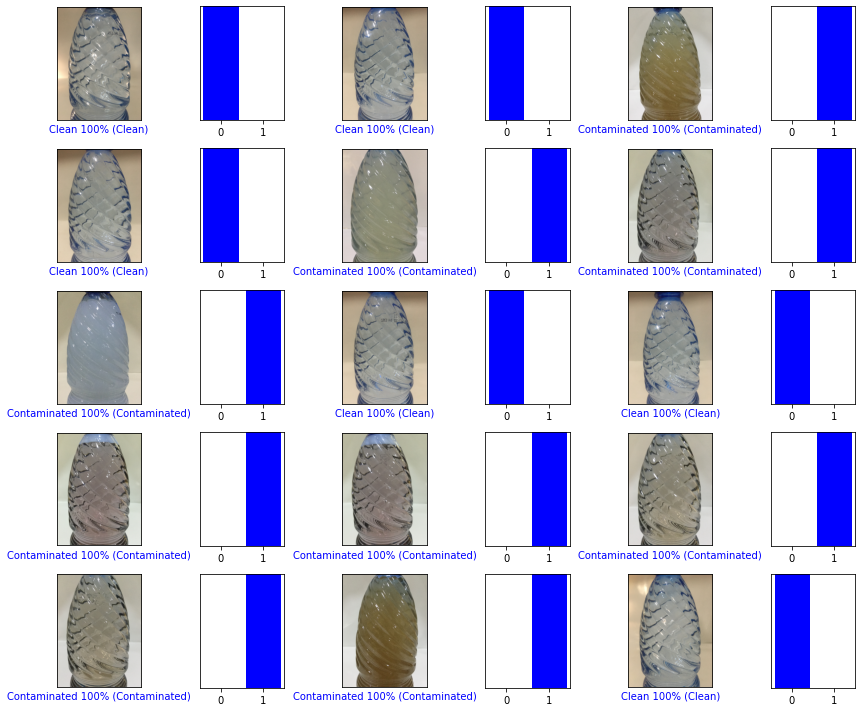

In [31]:
import matplotlib.pyplot as plt

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
high = testLabels.shape[0]
numRows = 5
numCols = 3
numImages = numRows*numCols

selectedIndex = np.random.randint(0, high, size=numImages)

somePredictions = predictions[selectedIndex]
someImages = testImages[selectedIndex]
someLabels = testLabels[selectedIndex]

plt.figure(figsize=(2*2*numCols, 2*numRows))
for i in range(numImages):
    plt.subplot(numRows, 2*numCols, 2*i+1)
    plot_image(i, predictions[i], someLabels, someImages)
    plt.subplot(numRows, 2*numCols, 2*i+2)
    plot_value_array(i, predictions[i], testLabels)
plt.tight_layout()
plt.show()

In [32]:
# Grab an image from the test dataset.
img = testImages[1]

print(img.shape)

(326, 244, 3)


In [99]:
import numpy as np

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 326, 244, 3)


In [34]:
predictionsSingle = probabilityModel.predict(img)

print(predictionsSingle)

[[1.0000000e+00 4.3148424e-19]]


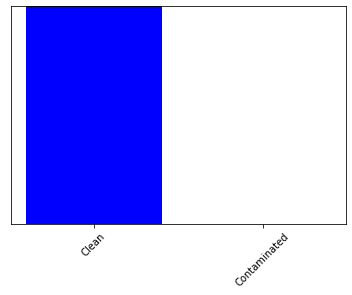

In [35]:
plot_value_array(1, predictionsSingle[0], testLabels)
_ = plt.xticks(range(outputShape), classNames, rotation=45)
plt.show()

In [36]:
np.argmax(predictionsSingle[0])

0

In [67]:
print(testAcc)

version = f'{testAcc*100:.0f}'

print(version)



0.9512194991111755
95


In [69]:
import os

exportPath = ""

if testAcc > 0.95:
    modelDir = 'tf_model'
    version = f"4_{(testAcc*100):.0f}"

    # for SavedModel format
    exportPath = os.path.join(modelDir, version)
    # save the model
    model.save(exportPath, save_format="tf")

    print('\nexport path = {}'.format(exportPath))

    !dir {exportPath}

INFO:tensorflow:Assets written to: tf_model\4_95\assets

export path = tf_model\4_95
 Volume in drive C is Windows
 Volume Serial Number is 7E8A-CA12

 Directory of c:\Users\gokel\source\repos\cu\ini\tf_model\4_95

08/17/2021  11:19 AM    <DIR>          .
08/17/2021  11:19 AM    <DIR>          ..
08/17/2021  11:16 AM    <DIR>          assets
08/17/2021  11:19 AM             7,488 keras_metadata.pb
08/17/2021  11:19 AM            74,220 saved_model.pb
08/17/2021  11:19 AM    <DIR>          variables
               2 File(s)         81,708 bytes
               4 Dir(s)   3,044,851,712 bytes free


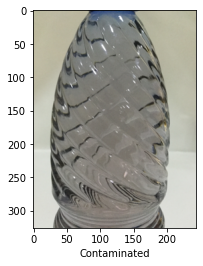

In [46]:
x_img = testImages[5]

plt.imshow(x_img)
plt.xlabel(classNames[testLabels[5]])
plt.show()

In [55]:
# load SavedModel format

newModel = tf.keras.models.load_model(exportPath)

# Check its architecture
newModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 238632)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               30545024  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 30,545,282
Trainable params: 30,545,282
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Evaluate the restored model
loss, acc = newModel.evaluate(testImages, testLabels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

newPredictions = newModel.predict(testImages)

print(newPredictions.shape)

3/3 - 1s - loss: 0.7313 - accuracy: 0.9512
Restored model, accuracy: 95.12%
(82, 2)


In [80]:
print("prediction: ", np.argmax(newPredictions[0]))
print("actual: ", testLabels[0])


prediction:  0
actual:  0


In [58]:
testLabels[0]

0

In [40]:
import json
# create json object

jsonData = json.dumps({"signature_name":"serving_default", "instances":testImages[34].tolist()})

In [41]:
import requests

apiRunning=False

if apiRunning == True:
    headers = {"content-type":"application/json"}
    json_response = requests.post('http://localhost:8501/v1/models/giwa:predict', data=jsonData, headers=headers)

    predictions = json.loads(json_response.text)['predictions']

    pred = [np.argmax(predictions[p]) for p in range(len(predictions))]
    print("Predictions: ", pred)
    print("Actual: ", testLabels[5].tolist())

In [76]:
#  HDF5 format

import os

exportPath = ""

if testAcc > 0.95:
    modelDir = 'tf_model'
    version = f"4_{(testAcc*100):.0f}"

    # for HDF5 format
    exportPath = os.path.join(modelDir, f"{version}.h5")
    # Save the entire model to a HDF5 file.
    # The '.h5' extension indicates that the model should be saved to HDF5.
    model.save(exportPath)

    !dir {exportPath}

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [81]:

# Recreate the exact same model, including its weights and the optimizer
newModelHF = tf.keras.models.load_model(exportPath)

# Show the model architecture
newModelHF.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 238632)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               30545024  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 30,545,282
Trainable params: 30,545,282
Non-trainable params: 0
_________________________________________________________________


In [82]:
# Evaluate the restored model
loss, acc = newModelHF.evaluate(testImages, testLabels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

newPredictions = newModelHF.predict(testImages)

print(newPredictions.shape)

3/3 - 0s - loss: 0.7313 - accuracy: 0.9512
Restored model, accuracy: 95.12%
(82, 2)


In [84]:
print("prediction: ", np.argmax(newPredictions[0]))
print("actual: ", testLabels[0])


prediction:  1
actual:  1
